Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Домашнее задание № 1 (демо).<br> Анализ данных по доходу населения UCI Adult</center>

**В задании предлагается с помощью Pandas ответить на несколько вопросов по данным репозитория UCI [Adult](https://archive.ics.uci.edu/ml/datasets/Adult) (качать данные не надо – они уже есть в репозитории).**

Уникальные значения признаков (больше информации по ссылке выше):
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- salary: >50K,<=50K

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('adult.data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**1. Сколько мужчин и женщин (признак *sex*) представлено в этом наборе данных?**

In [4]:
sex_count = data['sex'].value_counts()
print(sex_count)

sex
Male      21790
Female    10771
Name: count, dtype: int64


**2. Каков средний возраст (признак *age*) женщин?**

In [5]:
mean_age_women = data[data['sex'] == 'Female']['age'].mean()
print(f" Average age of women: {round(mean_age_women, 2)}")

 Average age of women: 36.86


**3. Какова доля граждан Германии (признак *native-country*)?**

In [6]:
german_citizens_percentage = (data['native-country'] == 'Germany').mean()
print(f"Percentage of German citizens in data: {round(german_citizens_percentage * 100, 2)}%")

Percentage of German citizens in data: 0.42%


**4-5. Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак *salary*) и тех, кто получает менее 50K в год? **

In [7]:
age_stats = data.groupby('salary')['age'].agg(['mean', 'std'])
print(age_stats)

             mean        std
salary                      
<=50K   36.783738  14.020088
>50K    44.249841  10.519028


**6. Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак *education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* или *Doctorate*)**

In [8]:
high_education = ['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate']
has_high_education = data[data['salary'] == '>50K']['education'].isin(high_education).all()

if has_high_education:
    print("Yes, all people with salary over 50K have at least higher education.")
else:
    print("No, not all people with salary over 50K have at least higher education.")

No, not all people with salary over 50K have at least higher education.


**7. Выведите статистику возраста для каждой расы (признак *race*) и каждого пола. Используйте *groupby* и *describe*. Найдите таким образом максимальный возраст мужчин расы *Amer-Indian-Eskimo*.**

In [9]:
race_gender_stats = data.groupby(['race', 'sex'])['age'].describe()
print(round(race_gender_stats, 2))

max_AmIndEs_male_age = race_gender_stats.loc[('Amer-Indian-Eskimo', 'Male'), 'max']
print(f"Max Amer-Indian-Eskimo male age: {max_AmIndEs_male_age}")

                             count   mean    std   min   25%   50%    75%  \
race               sex                                                      
Amer-Indian-Eskimo Female    119.0  37.12  13.11  17.0  27.0  36.0  46.00   
                   Male      192.0  37.21  12.05  17.0  28.0  35.0  45.00   
Asian-Pac-Islander Female    346.0  35.09  12.30  17.0  25.0  33.0  43.75   
                   Male      693.0  39.07  12.88  18.0  29.0  37.0  46.00   
Black              Female   1555.0  37.85  12.64  17.0  28.0  37.0  46.00   
                   Male     1569.0  37.68  12.88  17.0  27.0  36.0  46.00   
Other              Female    109.0  31.68  11.63  17.0  23.0  29.0  39.00   
                   Male      162.0  34.65  11.36  17.0  26.0  32.0  42.00   
White              Female   8642.0  36.81  14.33  17.0  25.0  35.0  46.00   
                   Male    19174.0  39.65  13.44  17.0  29.0  38.0  49.00   

                            max  
race               sex           
Amer-In

**8. Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак *marital-status*)? Женатыми считаем тех, у кого *marital-status* начинается с *Married* (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.**

In [10]:
data['marital_status_binary'] = data['marital-status'].apply(lambda x: 1 if x.startswith('Married') else 0)
grouped = data[data['salary'] == '>50K'].groupby('marital_status_binary')
percentage_high_earning = grouped.size() / grouped.size().sum()
if percentage_high_earning[1] > percentage_high_earning[0]:
    print("The majority receiving high salary (>50K) are married men.")
else:
    print("The majority receiving high salary (>50K) are among single men.")
print(f"Married {round(percentage_high_earning[1] * 100, 2)}% | Single {round(percentage_high_earning[0] * 100, 2)}%")

The majority receiving high salary (>50K) are married men.
Married 85.91% | Single 14.09%


**9. Какое максимальное число часов человек работает в неделю (признак *hours-per-week*)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?**

In [11]:
max_work_hours = data['hours-per-week'].max()
num_people = data[data['hours-per-week'] == max_work_hours].shape[0]
high_salary_percentage = (data[(data['hours-per-week'] == max_work_hours) & (data['salary'] == '>50K')].shape[0] / num_people) * 100
print(f'''
Max working hours per week: {max_work_hours}h
People working max hours: {num_people}
Percentage of people with high salary working max hours: {round(high_salary_percentage, 2)}%
''')


Max working hours per week: 99h
People working max hours: 85
Percentage of people with high salary working max hours: 29.41%



**10. Посчитайте среднее время работы (*hours-per-week*) зарабатывающих мало и много (*salary*) для каждой страны (*native-country*).**

In [32]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
work_hours_mean__salary_country = data.groupby(['salary', 'native-country'])['hours-per-week'].mean()
print(round(work_hours_mean__salary_country, 2))

salary  native-country            
<=50K   ?                             40.16
        Cambodia                      41.42
        Canada                        37.91
        China                         37.38
        Columbia                      38.68
        Cuba                          37.99
        Dominican-Republic            42.34
        Ecuador                       38.04
        El-Salvador                   36.03
        England                       40.48
        France                        41.06
        Germany                       39.14
        Greece                        41.81
        Guatemala                     39.36
        Haiti                         36.33
        Holand-Netherlands            40.00
        Honduras                      34.33
        Hong                          39.14
        Hungary                       31.30
        India                         38.23
        Iran                          41.44
        Ireland                       40.

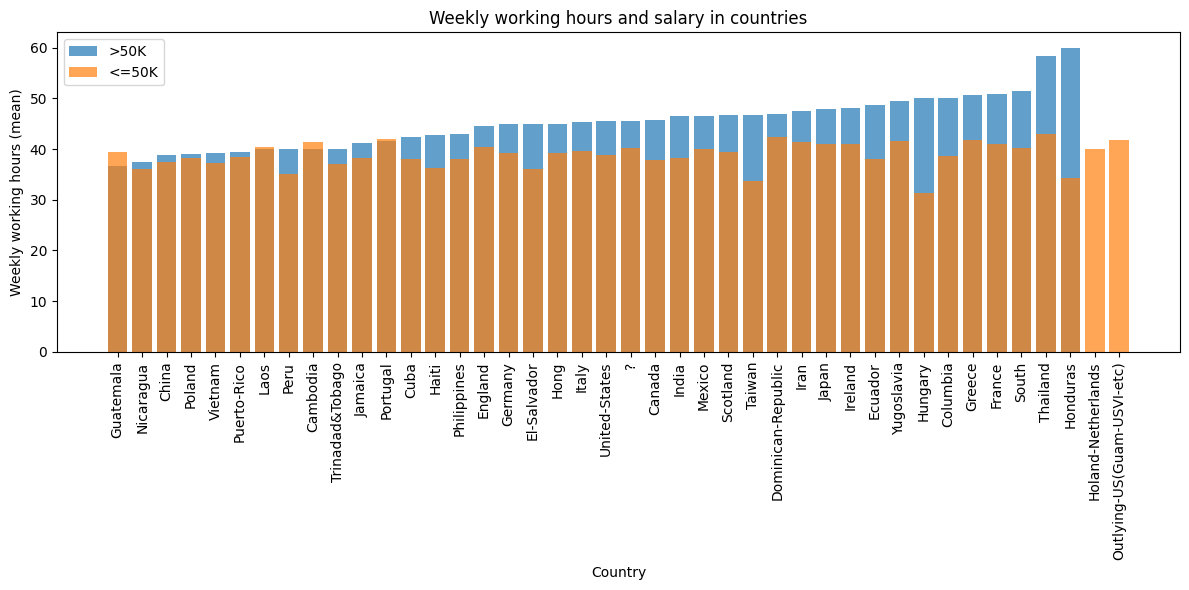

In [87]:
# additional visualization for task 10
work_hours_mean__salary_country = work_hours_mean__salary_country.unstack(level=0)
sorted_countries = work_hours_mean__salary_country['>50K'].sort_values()

plt.figure(figsize=(12, 6))
plt.bar(range(len(sorted_countries)), sorted_countries, label='>50K', alpha=0.7)
plt.bar(range(len(sorted_countries)), work_hours_mean__salary_country['<=50K'][sorted_countries.index], label='<=50K', alpha=0.7)

plt.xticks(range(len(sorted_countries)), sorted_countries.index, rotation=90)
plt.xlabel('Country')
plt.ylabel('Weekly working hours (mean)')
plt.title('Weekly working hours and salary in countries')
plt.legend()

plt.tight_layout()
plt.show()